In [1]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_10240/846281899.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# Importing Required Libraries

# Import the MNIST dataset from torchvision
import torchvision

# Import numpy for data manipulation
import numpy as np

# Load the MNIST dataset and download it if necessary
MNIST = torchvision.datasets.MNIST(".", download=True)

# Extract the training data, training labels, test data, and test labels from the MNIST dataset
train_data = MNIST.train_data
train_labels = MNIST.train_labels
test_data = MNIST.test_data
test_labels = MNIST.test_labels

# Combining and Subsampling Data

# Vertically combine the training and test data arrays
data = np.vstack([train_data, test_data])

# Vertically combine the training and test labels arrays
labels = np.hstack([train_labels, test_labels])

# Set a random seed for reproducibility
np.random.seed(42)

# Randomly select 20,000 samples from the combined data without replacement
indices = np.random.choice(len(data), size=20000, replace=False)

# Update the 'data' array to include only the selected samples
data = data[indices]

# Update the 'labels' array to include only the labels corresponding to the selected samples
labels = labels[indices]

# Reshape the 'data' array to ensure it is a 2D array
data = data.reshape(data.shape[0], -1)

# Explanation:
# This code imports the MNIST dataset using torchvision and extracts the training and test data along with their labels.
# It then vertically combines the training and test data arrays, as well as the labels arrays, to create a larger dataset.
# Randomly, 20,000 samples are selected from the combined dataset without replacement to reduce its size.
# Finally, both the 'data' and 'labels' arrays are reshaped into 2D arrays, which is a common format for input to machine learning models.



/home/yifei/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/yifei/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/yifei/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/yifei/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [3]:
# Set a random seed for reproducibility
np.random.seed(42)

# Randomly select 20,000 samples from the combined data without replacement
indices = np.random.choice(len(data), size=20000, replace=False)

# Update the 'data' array to include only the selected samples
data = data[indices]

# Update the 'labels' array to include only the labels corresponding to the selected samples
labels = labels[indices]

# Reshape the 'data' array to ensure it is a 2D array
data = data.reshape(data.shape[0], -1)

# Reshape the 'labels' array to ensure it is a 2D array
labels = labels.reshape(labels.shape[0], -1)

# Explanation:
# This code combines the training and test datasets and labels to create a larger dataset for analysis.
# It then randomly selects 20,000 samples from the combined dataset without replacement, ensuring randomness and diversity.
# The 'data' and 'labels' arrays are updated to contain only the selected samples.
# Finally, both the 'data' and 'labels' arrays are reshaped into 2D arrays, which is a common format for input to machine learning models.


In [4]:
data = np.concatenate((labels, data),axis=1)

In [5]:
# import dataset (comes with colab!)

# extract labels (number IDs) and remove from data
labels = data[:,0]
data   = data[:,1:]

# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

# Create train/test groups using DataLoader

In [6]:
# Step 1: convert to tensor
dataT   = torch.tensor( dataNorm ).float()
labelsT = torch.tensor( labels ).long()

# Step 2: use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)


# Step 3: convert into PyTorch Datasets
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

# Create the DL model

In [7]:
# create a class for the model
def createTheMNISTNet(nUnits,nLayers):

  class mnistNet(nn.Module):
    def __init__(self,nUnits,nLayers):
      super().__init__()

      # create dictionary to store the layers
      self.layers = nn.ModuleDict()
      self.nLayers = nLayers

      ### input layer
      self.layers['input'] = nn.Linear(784,nUnits)
      
      ### hidden layers
      for i in range(nLayers):
        self.layers[f'hidden{i}'] = nn.Linear(nUnits,nUnits)

      ### output layer
      self.layers['output'] = nn.Linear(nUnits,10)
    


    # forward pass
    def forward(self,x):
      # input layer (note: the code in the video omits the relu after this layer)
      x = F.relu( self.layers['input'](x) )

      # hidden layers
      for i in range(self.nLayers):
        x = F.relu( self.layers[f'hidden{i}'](x) )
      
      # return output layer
      x = self.layers['output'](x)
      return x
  
  # create the model instance
  net = mnistNet(nUnits,nLayers)
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [8]:
# Generate an instance of the model and confirm that it returns the expected network.
nUnitsPerLayer = 12
nLayers = 4
net = createTheMNISTNet(nUnitsPerLayer,nLayers)
net

(mnistNet(
   (layers): ModuleDict(
     (input): Linear(in_features=784, out_features=12, bias=True)
     (hidden0): Linear(in_features=12, out_features=12, bias=True)
     (hidden1): Linear(in_features=12, out_features=12, bias=True)
     (hidden2): Linear(in_features=12, out_features=12, bias=True)
     (hidden3): Linear(in_features=12, out_features=12, bias=True)
     (output): Linear(in_features=12, out_features=10, bias=True)
   )
 ),
 CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

# Create a function that trains the model

In [9]:
# A function that trains a neural network model.
def function2trainTheModel(nUnits, nLayers):
  """
  Train a neural network model.

  Args:
    nUnits (int): Number of units in each hidden layer.
    nLayers (int): Number of hidden layers.

  Returns:
    trainAcc (list): List of training accuracies per epoch.
    testAcc (list): List of test accuracies per epoch.
    losses (torch.Tensor): Tensor containing training losses per epoch.
    net (nn.Module): Trained neural network model.
  """

  # Number of training epochs
  numepochs = 60

  # Create a new neural network model, loss function, and optimizer
  net, lossfun, optimizer = createTheMNISTNet(nUnits, nLayers)

  # Initialize lists to store results
  losses = torch.zeros(numepochs)  # Tensor to store training losses
  trainAcc = []  # List to store training accuracies per epoch
  testAcc = []   # List to store test accuracies per epoch

  # Loop over epochs
  for epochi in range(numepochs):

    # Initialize lists to store batch accuracy and loss
    batchAcc = []     # List to store batch accuracies
    batchLoss = []    # List to store batch losses

    # Loop over training data batches
    for X, y in train_loader:

      # Forward pass and compute loss
      yHat = net(X)   # Compute model predictions
      loss = lossfun(yHat, y)  # Calculate loss between predictions and true labels

      # Backpropagation
      optimizer.zero_grad()  # Reset gradients
      loss.backward()       # Compute gradients
      optimizer.step()       # Update model weights using the optimizer

      # Store loss from this batch
      batchLoss.append(loss.item())

      # Compute accuracy for this batch
      matches = torch.argmax(yHat, axis=1) == y  # Check if predictions match true labels
      matchesNumeric = matches.float()          # Convert matches to numbers (0 or 1)
      accuracyPct = 100 * torch.mean(matchesNumeric)  # Calculate batch accuracy (scaled by 100)
      batchAcc.append(accuracyPct)                  # Store batch accuracy

    # End of batch loop

    # Calculate the average training accuracy for this epoch
    trainAcc.append(np.mean(batchAcc))

    # Calculate and store average loss across the batches for this epoch
    losses[epochi] = np.mean(batchLoss)

    # Test accuracy on the test dataset
    X, y = next(iter(test_loader))  # Extract X, y from the test dataloader
    with torch.no_grad():  # Deactivate autograd
      yHat = net(X)  # Compute test predictions

    # Calculate test accuracy and append it to the list
    testAcc.append(100 * torch.mean((torch.argmax(yHat, axis=1) == y).float()))

  # End of epochs

  # Return the results
  return trainAcc, testAcc, losses, net


# Run the model and show the results!

In [10]:
# Define the model parameters
numlayers = range(1, 4)             # Define a range of values for the number of hidden layers (1 to 3)
numunits = np.arange(50, 251, 50)   # Define an array of values for the number of units per hidden layer (50, 100, 150, 200, 250)

# Initialize output matrices to store accuracies
accuracies = np.zeros((2, len(numunits), len(numlayers)))
# The output matrices will have two rows: row 0 for training accuracies and row 1 for test accuracies.
# The dimensions will be determined by the combinations of numunits and numlayers.

# Start the experiment by iterating over units and layers
for unitidx in range(len(numunits)):
    for layeridx in range(len(numlayers)):
        # Nested loop to explore different combinations of units and layers

        # Create and train a fresh neural network model using function2trainTheModel
        trainAcc, testAcc, losses, net = function2trainTheModel(numunits[unitidx], numlayers[layeridx])
        # numunits[unitidx]: Number of units per hidden layer
        # numlayers[layeridx]: Number of hidden layers

        # Store the results (average of final 5 epochs)
        # Calculate the average training accuracy and test accuracy over the last 5 epochs
        accuracies[0, unitidx, layeridx] = np.mean(trainAcc[-5:])
        accuracies[1, unitidx, layeridx] = np.mean(testAcc[-5:])

        # Print a friendly status message to track progress
        print(f'Finished units {unitidx + 1}/{len(numunits)} and layers {layeridx + 1}/{len(numlayers)}')



Finished units 1/5 and layers 1/3
Finished units 1/5 and layers 2/3
Finished units 1/5 and layers 3/3
Finished units 2/5 and layers 1/3
Finished units 2/5 and layers 2/3
Finished units 2/5 and layers 3/3
Finished units 3/5 and layers 1/3
Finished units 3/5 and layers 2/3
Finished units 3/5 and layers 3/3
Finished units 4/5 and layers 1/3
Finished units 4/5 and layers 2/3
Finished units 4/5 and layers 3/3
Finished units 5/5 and layers 1/3
Finished units 5/5 and layers 2/3
Finished units 5/5 and layers 3/3


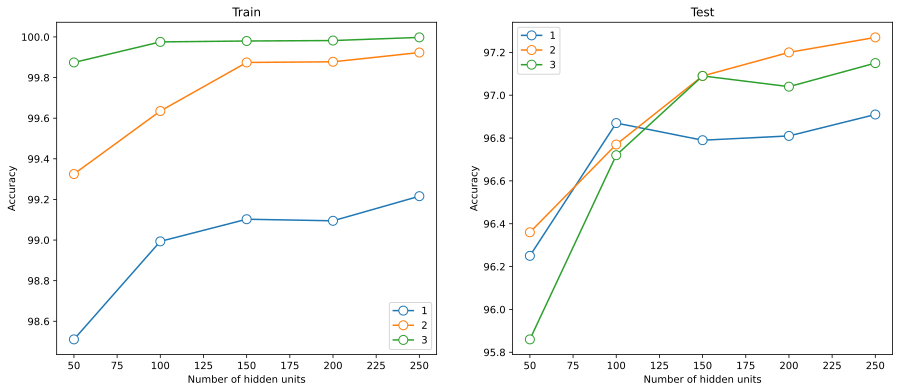

In [11]:
# Create subplots for displaying accuracy as a function of model depth
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# This creates a figure with two subplots arranged side by side.

# Plot training accuracy for different numbers of hidden units
ax[0].plot(numunits, accuracies[0, :, :], 'o-', markerfacecolor='w', markersize=9)
# numunits: x-axis values (number of hidden units)
# accuracies[0, :, :]: Training accuracies for different combinations of units and layers
# 'o-': Plot with circular markers connected by lines
# markerfacecolor='w': Make the markers white
# markersize=9: Set the marker size

# Plot test accuracy for different numbers of hidden units
ax[1].plot(numunits, accuracies[1, :, :], 'o-', markerfacecolor='w', markersize=9)
# Similar to the previous plot, but for test accuracies

for i in range(2):
    # Loop through the subplots (training and test accuracy)

    ax[i].legend(numlayers)
    # Add a legend to the plot, indicating the number of hidden layers for each line
    # numlayers: Contains the legend labels

    ax[i].set_ylabel('Accuracy')
    # Set the y-axis label to 'Accuracy'

    ax[i].set_xlabel('Number of hidden units')
    # Set the x-axis label to 'Number of hidden units'

    ax[i].set_title(['Train' if i == 0 else 'Test'][0])
    # Set the title of the subplot based on whether it's the training or test accuracy plot

plt.show()
# Display the plots
